In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn.modules.container import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.autograd import Variable

In [29]:
class PerceptronNet(nn.Module):
    def __init__(self):
        super(PerceptronNet, self).__init__()

        self.layer = Sequential(
            nn.Linear(1, 32),  
            nn.ReLU(inplace=True),
            nn.Linear(32, 64),  
            nn.ReLU(inplace=True),
            nn.Linear(64, 1)          
        )

    def forward(self, x):
        return self.layer(x)

In [30]:
class RegressionDemo:

    def __init__(self):
        self.x = np.array(np.arange(1,10,1), dtype=np.float32)
        self.y = self.x ** 2

        # self.x = self.x.reshape(-1,1)
        # self.y = self.y.reshape(-1,1)

        self.device  = "cuda" if torch.cuda.is_available() else "cpu"

    def start_training(self):

        X_train, X_test, y_train, y_test = train_test_split(self.x, self.y, test_size = 0.2, random_state = 42)

        X_train=torch.FloatTensor(X_train).unsqueeze(1).to(self.device)
        X_test=torch.FloatTensor(X_test).unsqueeze(1).to(self.device)
        y_train=torch.FloatTensor(y_train).unsqueeze(1).to(self.device)
        y_test=torch.FloatTensor(y_test).unsqueeze(1).to(self.device)
        
        self.model = PerceptronNet().to(self.device)

        criterion = nn.MSELoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=0.01)

        # Make torch datasets from train and test sets
        train = torch.utils.data.TensorDataset(X_train,y_train)
        test = torch.utils.data.TensorDataset(X_test,y_test)

        # Create train and test data loaders
        train_loader = torch.utils.data.DataLoader(train, batch_size = 64, shuffle = True)
        test_loader = torch.utils.data.DataLoader(test, batch_size = 64, shuffle = True)

        running_loss_history = []
        epoch_list = []
        val_running_loss_history = []

        print("Starting with the training...")

        epochs = 10

        for e in range(epochs):

            running_loss = 0.0
            val_running_loss = 0.0

            for inputs, labels in train_loader:

                X = Variable(inputs).to(self.device)
                Y = Variable(labels).to(self.device)

                output = self.model(X)
                
                loss = criterion(output, Y).requires_grad_()

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()                

            else:
                with torch.no_grad():
                    for val_inputs, val_labels in test_loader:
                        val_inputs = Variable(val_inputs).to(self.device)
                        val_labels = Variable(val_labels).to(self.device)
                        val_outputs = self.model(val_inputs)
                        val_loss = criterion(val_outputs, val_labels).requires_grad_()
                        
                        val_running_loss += val_loss.item()
            
            epoch_loss = running_loss/len(train_loader.dataset)
            running_loss_history.append(epoch_loss)
            
            val_epoch_loss = val_running_loss/len(test_loader.dataset)
            val_running_loss_history.append(val_epoch_loss)

            print('epoch :', (e+1))
            print('training loss: {:.4f}'.format(epoch_loss))
            print('validation loss: {:.4f}'.format(val_epoch_loss))

            epoch_list.append(e + 1)

    def prediction(self):
        x_tensor = torch.FloatTensor(self.x).unsqueeze(1).to(self.device)
        input = Variable(x_tensor).to(self.device).requires_grad_()
        pred = self.model(input).to('cpu').detach().numpy()
        plt.plot(self.x,self.y, '.')
        plt.plot(self.x, pred, '-')
        plt.show()

Starting with the training...
epoch : 1
training loss: 238.2907
validation loss: 5498.1450
epoch : 2
training loss: 1552.9191
validation loss: 1067.7876
epoch : 3
training loss: 239.3789
validation loss: 1045.3948
epoch : 4
training loss: 233.5328
validation loss: 1023.8511
epoch : 5
training loss: 227.9183
validation loss: 1003.1237
epoch : 6
training loss: 222.5262
validation loss: 983.1805
epoch : 7
training loss: 217.3476
validation loss: 963.9915
epoch : 8
training loss: 212.3741
validation loss: 945.5275
epoch : 9
training loss: 207.5976
validation loss: 927.7604
epoch : 10
training loss: 203.0101
validation loss: 910.6632


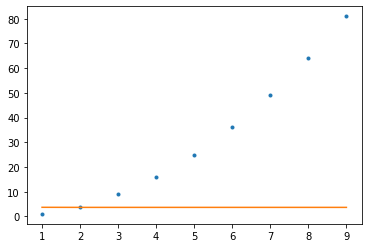

In [31]:
rd = RegressionDemo()
rd.start_training()
rd.prediction()

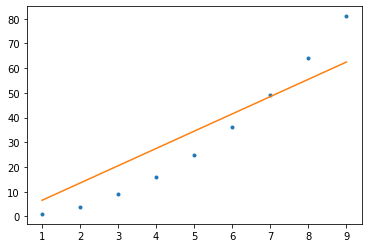